In [1]:
import numpy as np
from astropy.io import fits

## Opt 1: AstroPy IO - FITS

In [2]:
# This fits file was downloaded automaticall with astroml based on the book's chapter 1 example
hdulist = fits.open("spSpec-53166-1615-513.fit")

In [3]:
print(len(hdulist))

7


In [4]:
for i in hdulist:
    print(i)

In [5]:
hdulist[0].header

SIMPLE  =                    T                                                  
BITPIX  =                  -32                                                  
NAXIS   =                    2                                                  
NAXIS1  =                 3856                                                  
NAXIS2  =                    5                                                  
EXTEND  =                    T /                                                
TAI     =        4593557832.61 / 1st row - Number of seconds since Nov 17 1858  
RA      =            187.46463 / 1st row - Right ascension of telescope boresigh
DEC     =            12.487701 / 1st row - Declination of telescope boresight (d
EQUINOX =              2000.00 /                                                
RADECSYS= 'FK5     '           /                                                
AZ      =        300.020823333 / 1st row - Azimuth  (encoder) of tele (0=N?) (de
ALT     =        56.03787233

In [6]:
hdulist[0].data.shape

(5, 3856)

In [7]:
data = hdulist[0].data
name = hdulist[0].header['NAME']
spec_cln = hdulist[0].header['SPEC_CLN']
coeff0 = hdulist[0].header['COEFF0']
coeff1 = hdulist[0].header['COEFF1']
z = hdulist[0].header['Z']
zerr = hdulist[0].header['Z_ERR']
zconf = hdulist[0].header['Z_CONF']

spectrum = data[0]
spectrum_cont = data[1]
error = data[2]
mask = data[3]
large_err = error.max() * 2
hdulist = hdulist

In [8]:
wavelength = 10 ** (coeff0 + coeff1 * np.arange(len(spectrum)))

coeff0_restframe = coeff0 - np.log10(1 + z)
wavelength_restframe = 10 ** (coeff0_restframe + coeff1 * np.arange(len(spectrum)))

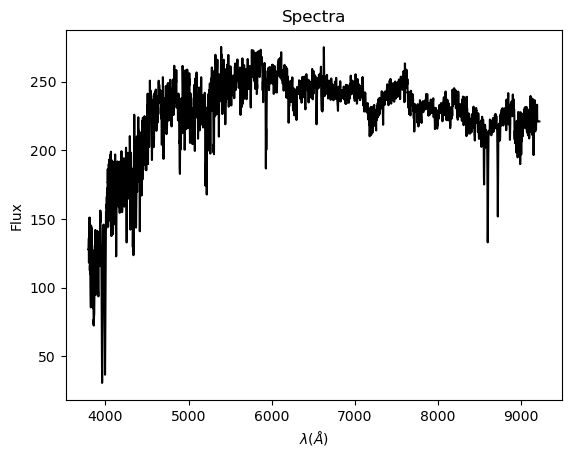

In [9]:
import matplotlib.pyplot as plt
plt.plot(wavelength, spectrum, "-k")
plt.xlabel(r"$\lambda (\AA) $")
plt.ylabel("Flux")
plt.title("Spectra")
plt.show()

## Opt 2: SpecUtils

In [10]:
import os
from specutils import Spectrum1D

file_path = 'spSpec-53166-1615-513.fit'

spec = Spectrum1D.read(file_path) # format='SDSS-I/II spSpec'

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
a string value was expected. [astropy.wcs.wcs]


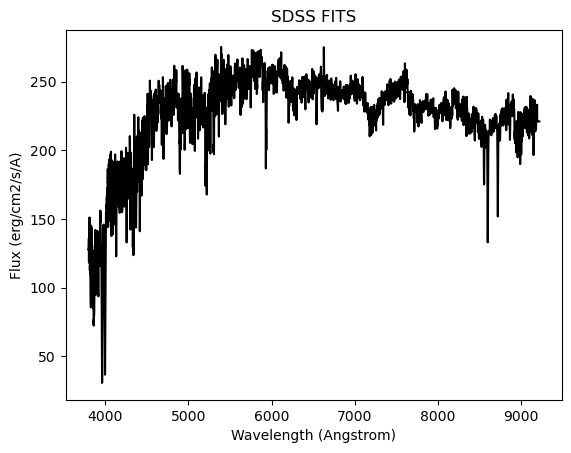

In [11]:
plt.title('SDSS FITS')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux (erg/cm2/s/A)')
plt.plot(spec.wavelength, spec.flux, "k-")
plt.show()